In [64]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
#Energy Portfolio 
#Need to update it so it just reads the csv
stocks = yf.download(["ELVT", "LPG", "NESR", "LUKOY", "WEN", "OMP", "WG.L", "VIHD" ], start = "2018-01-01", end = "2021-03-04")

[*********************100%***********************]  8 of 8 completed


In [66]:
stocks.head()

Adj Close                                                    \
                ELVT   LPG      LUKOY  NESR        OMP VIHD        WEN   
Date                                                                     
2018-01-02      7.75  8.40  49.588917  9.96  11.347914  NaN  15.377948   
2018-01-03      8.02  8.23  50.538799  9.96  11.512093  NaN  15.736015   
2018-01-04      8.08  8.41  52.022987  9.95  11.682835  NaN  15.556983   
2018-01-05      8.30  8.10  52.913502  9.90  11.820743  NaN  15.820820   
2018-01-08      8.27  7.78  53.600471  9.96  12.050591  NaN  15.660632   

                       Close        ...   Open                Volume  \
                  WG.L  ELVT   LPG  ...    WEN        WG.L      ELVT   
Date                                ...                                
2018-01-02  504.890747  7.75  8.40  ...  16.41  651.000000  388500.0   
2018-01-03  507.974945  8.02  8.23  ...  16.91  658.200012  237000.0   
2018-01-04  526.943054  8.08  8.41  ...  16.75  670.599976  218200.0   
2018-01-05  531.569519  8.30  8.10  ...  16.68  685.599976   95300.0   
2018-01-08  528.793640  8.27  7.78  ...  16.73  689.400024  151200.0   

                                                                             
                 LPG     LUKOY     NESR      OMP VIHD        WEN       WG.L  
Date                                                                         
2018-01-02  267900.0   27300.0  24900.0  38400.0  NaN  2577400.0  1514071.0  
2018-01-03  236100.0   35800.0  65900.0  28600.0  NaN  3073600.0  2097821.0  
2018-01-04  223800.0   81100.0   1200.0  84800.0  NaN  2552000.0  5792763.0  
2018-01-05  168100.0  284200.0  29900.0  27300.0  NaN  3277700.0  3299222.0  
2018-01-08  225600.0   85000.0  10200.0  73500.0  NaN  1915100.0  1688988.0  

[5 rows x 48 columns]

In [67]:
stocks =  stocks["Adj Close"].copy()

In [68]:
stocks.head()

,ELVT,LPG,LUKOY,NESR,OMP,VIHD,WEN,WG.L
Date,,,,,,,,
2018-01-02,7.75,8.40,49.588917,9.96,11.347914,NaN,15.377948,504.890747
2018-01-03,8.02,8.23,50.538799,9.96,11.512093,NaN,15.736015,507.974945
2018-01-04,8.08,8.41,52.022987,9.95,11.682835,NaN,15.556983,526.943054
2018-01-05,8.30,8.10,52.913502,9.90,11.820743,NaN,15.820820,531.569519
2018-01-08,8.27,7.78,53.600471,9.96,12.050591,NaN,15.660632,528.793640


In [69]:
ret = stocks.pct_change().dropna()

In [70]:
ret.head()

,ELVT,LPG,LUKOY,NESR,OMP,VIHD,WEN,WG.L
Date,,,,,,,,
2018-03-08,-0.004060,-0.003947,0.000919,0.000000,-0.011173,0.0,0.029465,-0.003476
2018-03-09,0.002717,0.026420,0.019125,0.000000,-0.012430,0.0,0.023365,0.040900
2018-03-12,0.000000,0.021879,-0.009308,0.000000,-0.008581,0.0,-0.009703,-0.006396
2018-03-13,0.001355,-0.010076,-0.006516,-0.002010,-0.009232,0.0,-0.020173,-0.021153
2018-03-14,-0.002706,0.007634,0.002135,-0.001007,-0.015143,0.0,-0.000588,-0.014406


In [71]:
ret.tail()

,ELVT,LPG,LUKOY,NESR,OMP,VIHD,WEN,WG.L
Date,,,,,,,,
2021-02-25,-0.025882,-0.008333,-0.022646,0.033411,0.084848,0.000000,-0.018111,0.001939
2021-02-26,-0.014493,-0.048892,-0.030200,-0.003759,0.069832,0.278008,0.018445,-0.035161
2021-03-01,0.080882,0.028112,0.017181,0.028679,0.042820,0.000000,0.041606,0.041792
2021-03-02,0.038549,0.017969,0.009501,-0.054292,0.048072,-0.025974,0.000940,-0.024711
2021-03-03,-0.041485,0.013047,0.007320,0.024825,0.009556,0.000000,-0.055399,0.008885


In [72]:
ret.mean(axis = 1)

Date
2018-03-08    0.000966
2018-03-09    0.012512
2018-03-12   -0.001514
2018-03-13   -0.008476
2018-03-14   -0.003010
                ...   
2021-02-25    0.005653
2021-02-26    0.029222
2021-03-01    0.035134
2021-03-02    0.001257
2021-03-03   -0.004156
Length: 768, dtype: float64

In [73]:
no_assets = len(stocks.columns)
no_assets

8

In [74]:
weights = [1/no_assets for i in range(no_assets)]
weights

[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]

In [75]:
ret.mul(weights, axis = "columns").sum(axis = "columns")

Date
2018-03-08    0.000966
2018-03-09    0.012512
2018-03-12   -0.001514
2018-03-13   -0.008476
2018-03-14   -0.003010
                ...   
2021-02-25    0.005653
2021-02-26    0.029222
2021-03-01    0.035134
2021-03-02    0.001257
2021-03-03   -0.004156
Length: 768, dtype: float64

In [76]:
ret.dot(weights)

Date
2018-03-08    0.000966
2018-03-09    0.012512
2018-03-12   -0.001514
2018-03-13   -0.008476
2018-03-14   -0.003010
                ...   
2021-02-25    0.005653
2021-02-26    0.029222
2021-03-01    0.035134
2021-03-02    0.001257
2021-03-03   -0.004156
Length: 768, dtype: float64

In [77]:
ret["EWP"] = ret.dot(weights)

In [78]:
ret.head()

,ELVT,LPG,LUKOY,NESR,OMP,VIHD,WEN,WG.L,EWP
Date,,,,,,,,,
2018-03-08,-0.004060,-0.003947,0.000919,0.000000,-0.011173,0.0,0.029465,-0.003476,0.000966
2018-03-09,0.002717,0.026420,0.019125,0.000000,-0.012430,0.0,0.023365,0.040900,0.012512
2018-03-12,0.000000,0.021879,-0.009308,0.000000,-0.008581,0.0,-0.009703,-0.006396,-0.001514
2018-03-13,0.001355,-0.010076,-0.006516,-0.002010,-0.009232,0.0,-0.020173,-0.021153,-0.008476
2018-03-14,-0.002706,0.007634,0.002135,-0.001007,-0.015143,0.0,-0.000588,-0.014406,-0.003010


In [79]:
summary = ret.agg(["mean", "std"]).T
summary

,mean,std
ELVT,0.000539,0.048352
LPG,0.001289,0.033571
LUKOY,0.000750,0.025050
NESR,0.000915,0.033658
OMP,0.002143,0.056180
VIHD,0.034092,0.706932
WEN,0.000774,0.030518
WG.L,0.132539,3.709541
EWP,0.021630,0.472324


In [80]:
summary.columns = ["Return", "Risk"]

In [81]:
summary.Return = summary.Return*252
summary.Risk = summary.Risk * np.sqrt(252)#
summary

,Return,Risk
ELVT,0.135805,0.767568
LPG,0.324827,0.532923
LUKOY,0.189066,0.397659
NESR,0.230567,0.534299
OMP,0.539928,0.891827
VIHD,8.591246,11.222191
WEN,0.194997,0.484455
WG.L,33.399830,58.887142
EWP,5.450783,7.497909


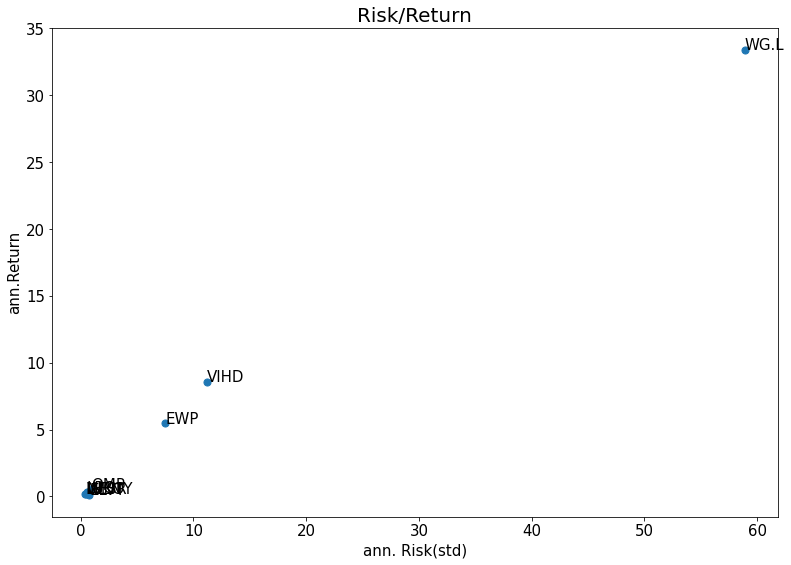

In [82]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann.Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [83]:
def ann_risk_return(return_df):
    summary = return_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

In [84]:
stocks.head()

,ELVT,LPG,LUKOY,NESR,OMP,VIHD,WEN,WG.L
Date,,,,,,,,
2018-01-02,7.75,8.40,49.588917,9.96,11.347914,NaN,15.377948,504.890747
2018-01-03,8.02,8.23,50.538799,9.96,11.512093,NaN,15.736015,507.974945
2018-01-04,8.08,8.41,52.022987,9.95,11.682835,NaN,15.556983,526.943054
2018-01-05,8.30,8.10,52.913502,9.90,11.820743,NaN,15.820820,531.569519
2018-01-08,8.27,7.78,53.600471,9.96,12.050591,NaN,15.660632,528.793640


In [85]:
ret = stocks.pct_change().dropna()
ret.head()

,ELVT,LPG,LUKOY,NESR,OMP,VIHD,WEN,WG.L
Date,,,,,,,,
2018-03-08,-0.004060,-0.003947,0.000919,0.000000,-0.011173,0.0,0.029465,-0.003476
2018-03-09,0.002717,0.026420,0.019125,0.000000,-0.012430,0.0,0.023365,0.040900
2018-03-12,0.000000,0.021879,-0.009308,0.000000,-0.008581,0.0,-0.009703,-0.006396
2018-03-13,0.001355,-0.010076,-0.006516,-0.002010,-0.009232,0.0,-0.020173,-0.021153
2018-03-14,-0.002706,0.007634,0.002135,-0.001007,-0.015143,0.0,-0.000588,-0.014406


In [86]:
summary = ann_risk_return(ret)
summary.head()

,Return,Risk
ELVT,0.135805,0.767568
LPG,0.324827,0.532923
LUKOY,0.189066,0.397659
NESR,0.230567,0.534299
OMP,0.539928,0.891827


In [87]:
noa = len(stocks.columns)
noa

8

In [88]:
nop = 100000

In [89]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [90]:
matrix

array([[0.69646919, 0.28613933, 0.22685145, ..., 0.42310646, 0.9807642 ,
        0.68482974],
       [0.4809319 , 0.39211752, 0.34317802, ..., 0.0596779 , 0.39804426,
        0.73799541],
       [0.18249173, 0.17545176, 0.53155137, ..., 0.84943179, 0.72445532,
        0.61102351],
       ...,
       [0.50651087, 0.11972245, 0.0230124 , ..., 0.56289388, 0.2611478 ,
        0.39864966],
       [0.66135726, 0.64318359, 0.36228115, ..., 0.65800256, 0.58546382,
        0.3803124 ],
       [0.0494901 , 0.89249553, 0.44753033, ..., 0.57595483, 0.71890278,
        0.16433422]])

In [91]:
# Make it sum up to 1 
matrix.sum(axis = 1, keepdims = True)

array([[4.56894411],
       [3.57956695],
       [4.24063404],
       ...,
       [3.05956345],
       [4.65612887],
       [3.90115198]])

In [92]:
weights = matrix / matrix.sum(axis = 1, keepdims = True)
weights

array([[0.15243548, 0.06262702, 0.04965074, ..., 0.09260487, 0.21465883,
        0.14988797],
       [0.13435477, 0.10954328, 0.09587138, ..., 0.01667182, 0.111199  ,
        0.20616891],
       [0.04303407, 0.04137394, 0.12534715, ..., 0.20030773, 0.17083656,
        0.14408777],
       ...,
       [0.16555005, 0.03913057, 0.00752146, ..., 0.1839785 , 0.08535459,
        0.13029625],
       [0.14204015, 0.13813698, 0.07780737, ..., 0.14131966, 0.12574047,
        0.08167996],
       [0.01268602, 0.22877743, 0.11471748, ..., 0.14763712, 0.18427961,
        0.04212454]])

In [93]:
weights.sum(axis = 1, keepdims = True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [94]:
port_ret = ret.dot(weights.T)
port_ret

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-08,0.003224,0.000301,0.002639,-0.001928,0.004066,-0.000387,-0.000545,0.000995,-0.001487,-0.002699,...,-0.000769,-0.000703,0.000757,0.001374,-0.002584,0.004633,0.004523,0.000480,0.000189,0.002055
2018-03-09,0.012207,0.014600,0.011633,0.010906,0.013469,0.012730,0.008482,0.013842,0.014977,0.013112,...,0.005151,0.008462,0.012631,0.009408,0.009603,0.014943,0.020097,0.008103,0.009375,0.011655
2018-03-12,-0.003485,-0.001945,-0.004125,-0.000807,-0.002076,-0.004646,0.000475,-0.001859,-0.003681,0.001408,...,-0.001572,-0.000122,-0.001745,-0.003023,-0.001049,-0.000574,-0.001284,-0.001461,-0.001120,0.000053
2018-03-13,-0.009945,-0.009691,-0.009303,-0.006103,-0.009347,-0.010306,-0.006926,-0.009146,-0.007503,-0.008702,...,-0.006089,-0.005855,-0.008346,-0.005973,-0.008305,-0.008475,-0.011250,-0.005970,-0.007970,-0.009724
2018-03-14,-0.004620,-0.004419,-0.004101,-0.003142,-0.002494,-0.006938,-0.002844,-0.002936,-0.004350,-0.004334,...,-0.003725,-0.001460,-0.002806,-0.001094,-0.004610,-0.000784,-0.002270,-0.003416,-0.003470,-0.002040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-25,0.008204,0.009025,0.009772,0.000693,0.001258,0.013860,0.013389,0.005465,-0.004126,0.012211,...,0.015714,0.007462,0.009214,0.001143,0.015775,-0.004534,-0.007002,0.010405,0.011134,0.011876
2021-02-26,0.028206,-0.002971,0.057315,0.046771,0.052727,0.019360,0.037434,0.025744,0.028009,0.004045,...,0.035528,0.034612,0.036578,0.069009,0.028722,0.001434,0.004523,0.047164,0.040840,0.042782
2021-03-01,0.040342,0.039924,0.029929,0.037204,0.032407,0.041766,0.035570,0.032827,0.038004,0.041886,...,0.039994,0.032870,0.028493,0.024436,0.037784,0.038700,0.037565,0.035713,0.036526,0.029604


In [95]:
port_summary = ann_risk_return(port_ret)
port_summary

,Return,Risk
0,6.006957,8.893764
1,7.235988,12.153770
2,6.719385,8.775908
3,6.612877,8.584885
4,5.695603,7.044348
...,...,...
99995,3.625737,5.327690
99996,7.551927,11.967873
99997,6.096346,7.950157
99998,4.173624,5.073613


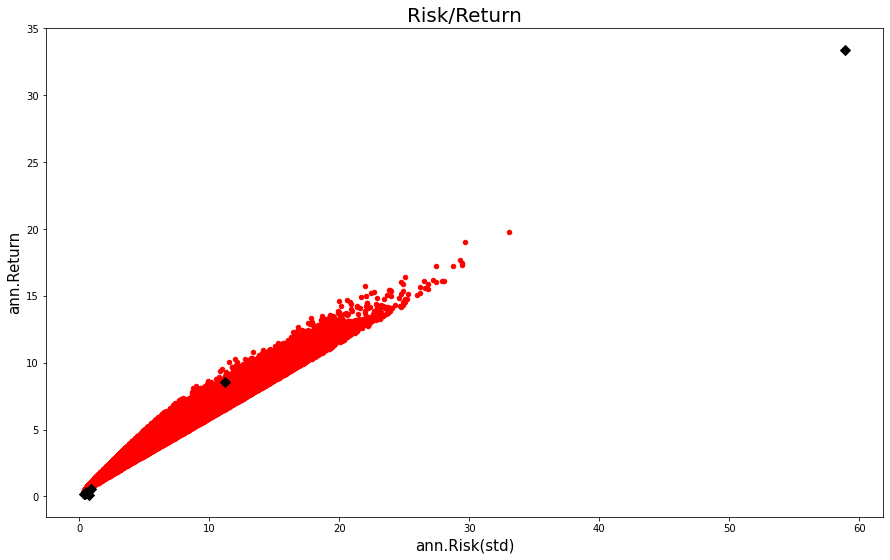

In [96]:
plt.figure(figsize = (15,9))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s=20, color="Red")
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"], s=50, color="black", marker = "D")
plt.xlabel("ann.Risk(std)", fontsize = 15)
plt.ylabel("ann.Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [97]:
#Using the Sharpe Ratio
risk_free_return = 0.017
risk_free_risk = 0

In [98]:
rf = [risk_free_return, risk_free_risk]
rf

[0.017, 0]

In [99]:
summary

,Return,Risk
ELVT,0.135805,0.767568
LPG,0.324827,0.532923
LUKOY,0.189066,0.397659
NESR,0.230567,0.534299
OMP,0.539928,0.891827
VIHD,8.591246,11.222191
WEN,0.194997,0.484455
WG.L,33.399830,58.887142


In [100]:
port_summary.head()

,Return,Risk
0,6.006957,8.893764
1,7.235988,12.153770
2,6.719385,8.775908
3,6.612877,8.584885
4,5.695603,7.044348


In [101]:
summary["Sharpe"] = (summary["Return"].sub(rf[0])) / summary["Risk"]
summary

,Return,Risk,Sharpe
ELVT,0.135805,0.767568,0.154781
LPG,0.324827,0.532923,0.577621
LUKOY,0.189066,0.397659,0.432697
NESR,0.230567,0.534299,0.399714
OMP,0.539928,0.891827,0.586356
VIHD,8.591246,11.222191,0.764044
WEN,0.194997,0.484455,0.367416
WG.L,33.399830,58.887142,0.566895


In [102]:
port_summary["Sharpe"] = (port_summary["Return"].sub(rf[0])) / port_summary["Risk"]
port_summary

,Return,Risk,Sharpe
0,6.006957,8.893764,0.673501
1,7.235988,12.153770,0.593971
2,6.719385,8.775908,0.763725
3,6.612877,8.584885,0.768313
4,5.695603,7.044348,0.806122
...,...,...,...
99995,3.625737,5.327690,0.677355
99996,7.551927,11.967873,0.629596
99997,6.096346,7.950157,0.764683
99998,4.173624,5.073613,0.819263


In [103]:
port_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Return  100000 non-null  float64
 1   Risk    100000 non-null  float64
 2   Sharpe  100000 non-null  float64
dtypes: float64(3)
memory usage: 3.1 MB


In [104]:
port_summary.describe()

,Return,Risk,Sharpe
count,100000.000000,100000.000000,100000.000000
mean,5.442723,7.651368,0.760848
std,2.358505,3.980174,0.129655
min,0.274984,0.370979,0.572173
25%,3.590002,4.296822,0.659734
50%,5.443350,7.529324,0.724195
75%,7.127688,10.524268,0.844241
max,19.768711,33.019840,1.192177


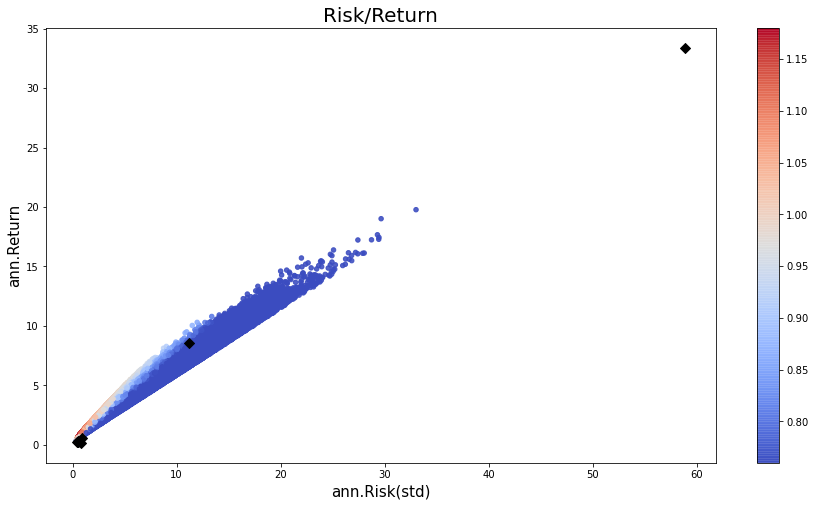

In [105]:
plt.figure(figsize = (15,8))
plt.scatter(port_summary.loc[:,"Risk"], port_summary.loc[:,"Return"], s=20, c = port_summary.loc[:,"Sharpe"], 
            cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.88)
plt.colorbar()
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"], s=50, color="black", marker = "D")
plt.xlabel("ann.Risk(std)", fontsize = 15)
plt.ylabel("ann.Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()


# Finding the optimal portfolio - The 'Max Sharpe Ratio Portfolio'


In [106]:
msrp = port_summary.Sharpe.idxmax()
msrp

57356

In [107]:
msrp_p = port_summary.iloc[msrp]
msrp_p

Return    0.853788
Risk      0.701899
Sharpe    1.192177
Name: 57356, dtype: float64

In [108]:
msrp_w = weights[msrp, :]
msrp_w

array([0.0103524 , 0.21679599, 0.20439207, 0.06482509, 0.27519541,
       0.04247448, 0.18058541, 0.00537915])

In [109]:
opt_weights = pd.Series(index = stocks.columns, data = msrp_w)
opt_weights

ELVT     0.010352
LPG      0.216796
LUKOY    0.204392
NESR     0.064825
OMP      0.275195
VIHD     0.042474
WEN      0.180585
WG.L     0.005379
dtype: float64

# Modern Port Theory & Asset Pricing (CAPM, Beta, Alpha, etc)


In [110]:
summary

,Return,Risk,Sharpe
ELVT,0.135805,0.767568,0.154781
LPG,0.324827,0.532923,0.577621
LUKOY,0.189066,0.397659,0.432697
NESR,0.230567,0.534299,0.399714
OMP,0.539928,0.891827,0.586356
VIHD,8.591246,11.222191,0.764044
WEN,0.194997,0.484455,0.367416
WG.L,33.399830,58.887142,0.566895


In [111]:
summary["TotalRisk_var"] = np.power(summary.Risk, 2) 
summary

,Return,Risk,Sharpe,TotalRisk_var
ELVT,0.135805,0.767568,0.154781,0.589160
LPG,0.324827,0.532923,0.577621,0.284007
LUKOY,0.189066,0.397659,0.432697,0.158133
NESR,0.230567,0.534299,0.399714,0.285475
OMP,0.539928,0.891827,0.586356,0.795356
VIHD,8.591246,11.222191,0.764044,125.937576
WEN,0.194997,0.484455,0.367416,0.234697
WG.L,33.399830,58.887142,0.566895,3467.695441


In [112]:
ret.head()

,ELVT,LPG,LUKOY,NESR,OMP,VIHD,WEN,WG.L
Date,,,,,,,,
2018-03-08,-0.004060,-0.003947,0.000919,0.000000,-0.011173,0.0,0.029465,-0.003476
2018-03-09,0.002717,0.026420,0.019125,0.000000,-0.012430,0.0,0.023365,0.040900
2018-03-12,0.000000,0.021879,-0.009308,0.000000,-0.008581,0.0,-0.009703,-0.006396
2018-03-13,0.001355,-0.010076,-0.006516,-0.002010,-0.009232,0.0,-0.020173,-0.021153
2018-03-14,-0.002706,0.007634,0.002135,-0.001007,-0.015143,0.0,-0.000588,-0.014406


In [113]:
COV = ret.cov()*252
COV

,ELVT,LPG,LUKOY,NESR,OMP,VIHD,WEN,WG.L
ELVT,0.589160,0.091459,0.078768,0.070260,0.182579,0.073183,0.129931,-0.123145
LPG,0.091459,0.284007,0.082093,0.073369,0.106413,0.058025,0.092442,0.301271
LUKOY,0.078768,0.082093,0.158133,0.061644,0.123596,0.101226,0.082371,0.188422
NESR,0.070260,0.073369,0.061644,0.285475,0.146226,-0.122445,0.032832,1.987995
OMP,0.182579,0.106413,0.123596,0.146226,0.795356,0.267685,0.075705,0.397767
VIHD,0.073183,0.058025,0.101226,-0.122445,0.267685,125.937576,-0.124962,-3.827194
WEN,0.129931,0.092442,0.082371,0.032832,0.075705,-0.124962,0.234697,0.398865
WG.L,-0.123145,0.301271,0.188422,1.987995,0.397767,-3.827194,0.398865,3467.695441


In [114]:
opt_weights

ELVT     0.010352
LPG      0.216796
LUKOY    0.204392
NESR     0.064825
OMP      0.275195
VIHD     0.042474
WEN      0.180585
WG.L     0.005379
dtype: float64

In [115]:
COV.iloc[-1, -1]

3467.695441256518

In [116]:
summary["SysRisk_var"] = COV.iloc[:, -1]
summary

,Return,Risk,Sharpe,TotalRisk_var,SysRisk_var
ELVT,0.135805,0.767568,0.154781,0.589160,-0.123145
LPG,0.324827,0.532923,0.577621,0.284007,0.301271
LUKOY,0.189066,0.397659,0.432697,0.158133,0.188422
NESR,0.230567,0.534299,0.399714,0.285475,1.987995
OMP,0.539928,0.891827,0.586356,0.795356,0.397767
VIHD,8.591246,11.222191,0.764044,125.937576,-3.827194
WEN,0.194997,0.484455,0.367416,0.234697,0.398865
WG.L,33.399830,58.887142,0.566895,3467.695441,3467.695441


In [117]:
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SysRisk_var"])
summary

,Return,Risk,Sharpe,TotalRisk_var,SysRisk_var,UnsystRisk_var
ELVT,0.135805,0.767568,0.154781,0.589160,-0.123145,7.123054e-01
LPG,0.324827,0.532923,0.577621,0.284007,0.301271,-1.726415e-02
LUKOY,0.189066,0.397659,0.432697,0.158133,0.188422,-3.028938e-02
NESR,0.230567,0.534299,0.399714,0.285475,1.987995,-1.702520e+00
OMP,0.539928,0.891827,0.586356,0.795356,0.397767,3.975889e-01
VIHD,8.591246,11.222191,0.764044,125.937576,-3.827194,1.297648e+02
WEN,0.194997,0.484455,0.367416,0.234697,0.398865,-1.641679e-01
WG.L,33.399830,58.887142,0.566895,3467.695441,3467.695441,9.094947e-13


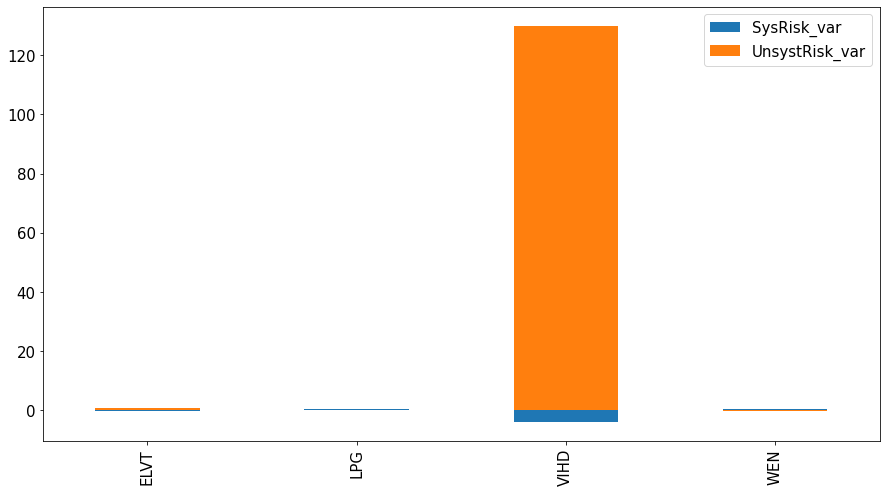

In [118]:
summary.iloc[[0, 1, 5 , 6], 4:].plot(kind = "bar", stacked = True, figsize = (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

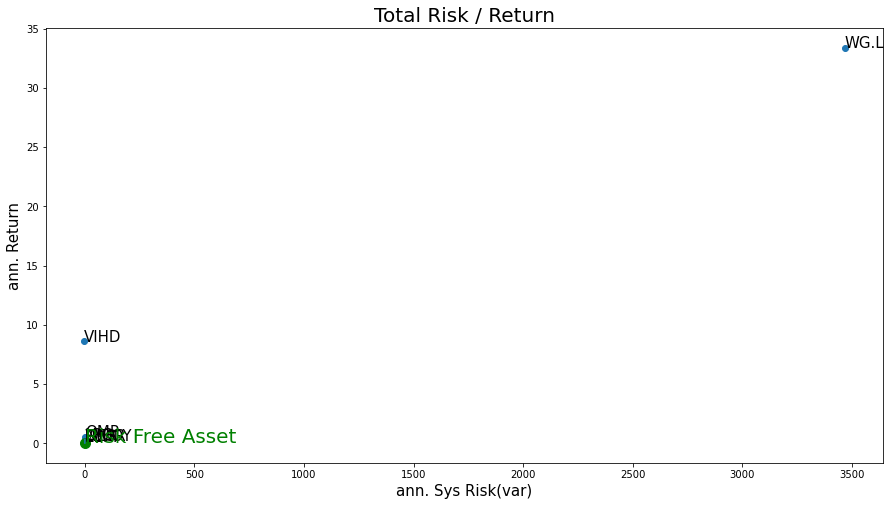

In [119]:
plt.figure(figsize = (15,8))
plt.scatter(summary.SysRisk_var, summary.Return)
for i in summary.index: 
    plt.annotate(i, xy =(summary.loc[i, "SysRisk_var"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.plot([rf[1], summary.loc["LPG", "SysRisk_var"]], [rf[0], summary.loc["LPG", "Return"]])
plt.scatter(rf[1], rf[0], s= 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.01), size = 20, color = "green")
plt.xlabel("ann. Sys Risk(var)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Total Risk / Return", fontsize = 20)
plt.show() 

In [120]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SysRisk_var,UnsystRisk_var
ELVT,0.135805,0.767568,0.154781,0.589160,-0.123145,7.123054e-01
LPG,0.324827,0.532923,0.577621,0.284007,0.301271,-1.726415e-02
LUKOY,0.189066,0.397659,0.432697,0.158133,0.188422,-3.028938e-02
NESR,0.230567,0.534299,0.399714,0.285475,1.987995,-1.702520e+00
OMP,0.539928,0.891827,0.586356,0.795356,0.397767,3.975889e-01
VIHD,8.591246,11.222191,0.764044,125.937576,-3.827194,1.297648e+02
WEN,0.194997,0.484455,0.367416,0.234697,0.398865,-1.641679e-01
WG.L,33.399830,58.887142,0.566895,3467.695441,3467.695441,9.094947e-13


In [121]:
summary.SysRisk_var / summary.loc["ELVT", "SysRisk_var"]

ELVT         1.000000
LPG         -2.446466
LUKOY       -1.530078
NESR       -16.143489
OMP         -3.230062
VIHD        31.078682
WEN         -3.238976
WG.L    -28159.379469
Name: SysRisk_var, dtype: float64

In [122]:
summary["beta"] = summary.SysRisk_var / summary.loc["ELVT", "SysRisk_var"]
summary

,Return,Risk,Sharpe,TotalRisk_var,SysRisk_var,UnsystRisk_var,beta
ELVT,0.135805,0.767568,0.154781,0.589160,-0.123145,7.123054e-01,1.000000
LPG,0.324827,0.532923,0.577621,0.284007,0.301271,-1.726415e-02,-2.446466
LUKOY,0.189066,0.397659,0.432697,0.158133,0.188422,-3.028938e-02,-1.530078
NESR,0.230567,0.534299,0.399714,0.285475,1.987995,-1.702520e+00,-16.143489
OMP,0.539928,0.891827,0.586356,0.795356,0.397767,3.975889e-01,-3.230062
VIHD,8.591246,11.222191,0.764044,125.937576,-3.827194,1.297648e+02,31.078682
WEN,0.194997,0.484455,0.367416,0.234697,0.398865,-1.641679e-01,-3.238976
WG.L,33.399830,58.887142,0.566895,3467.695441,3467.695441,9.094947e-13,-28159.379469


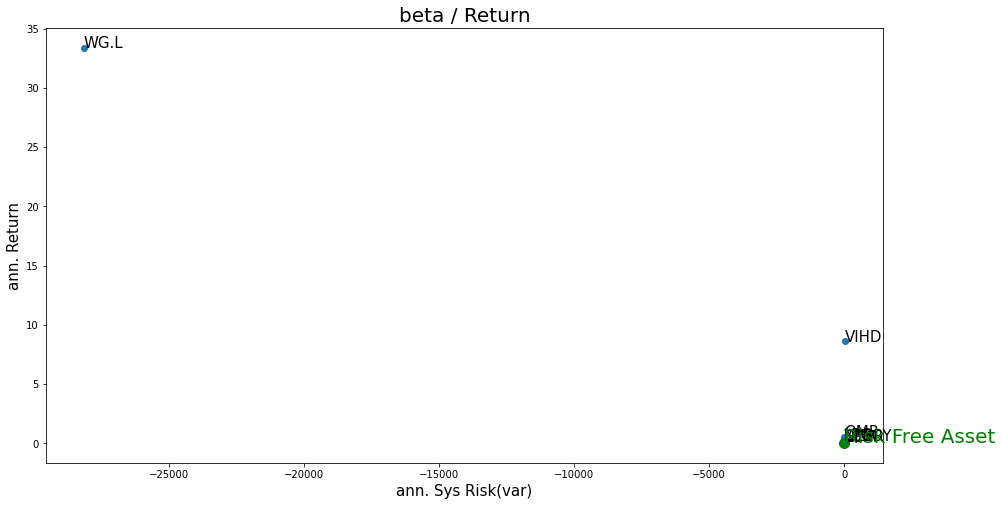

In [123]:
plt.figure(figsize = (15,8))
plt.scatter(summary.beta, summary.Return)
for i in summary.index: 
    plt.annotate(i, xy =(summary.loc[i, "beta"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.plot([rf[1], summary.loc["ELVT", "beta"]], [rf[0], summary.loc["ELVT", "Return"]])
plt.scatter(rf[1], rf[0], s= 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.01), size = 20, color = "green")
plt.xlabel("ann. Sys Risk(var)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("beta / Return", fontsize = 20)
plt.show() 